In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [491]:
#https://www.kaggle.com/datasets/divyansh22/summer-olympics-medals/data
df = pd.read_csv(r"C:\Users\find\OneDrive\Desktop\Resume_Projects\Python_EDA\olympic_data\Summer-Olympic-medals-1976-to-2008.csv", encoding='latin-1' )
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [492]:
df.shape

(15433, 11)

In [493]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [494]:
#DATA CLEANING
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [495]:
#Looking at what percentage of our data is null
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

City - 0.0075811572604159915%
Year - 0.0075811572604159915%
Sport - 0.0075811572604159915%
Discipline - 0.0075811572604159915%
Event - 0.0075811572604159915%
Athlete - 0.0075811572604159915%
Gender - 0.0075811572604159915%
Country_Code - 0.0075811572604159915%
Country - 0.0075811572604159915%
Event_gender - 0.0075811572604159915%
Medal - 0.0075811572604159915%


In [496]:
df = df.dropna()

In [497]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

1

In [498]:
df = df.drop_duplicates()

In [499]:
#Chaning that data 
df['Gender'].replace('Women','Female',inplace=True)
df['Gender'].replace('Men','Male',inplace=True)
df['Event_gender'].replace('W','Womens',inplace=True)
df['Event_gender'].replace('M','Mens',inplace=True)

In [500]:
df['Year'] = df['Year'].astype(int)

In [501]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Female,GDR,East Germany,Womens,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Male,URS,Soviet Union,Mens,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Male,USA,United States,Mens,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Male,ITA,Italy,Mens,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Female,USA,United States,Womens,Bronze


In [502]:
#Questions and exploratory analysis

<Axes: xlabel='Athlete'>

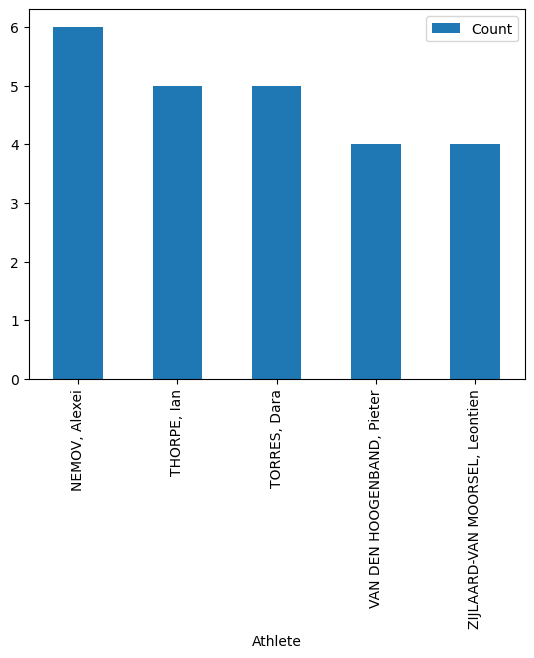

In [503]:
#What althlete won the most medals at the 2000 olympics?
df2000 = df.query('Year == 2000')
ath_data = df2000.groupby(['Athlete'])['Athlete'].count().reset_index(name = 'Count').sort_values(ascending = False , by = ['Count'])
top_ath = ath_data[:5]
top_ath.plot.bar(x = 'Athlete', y = 'Count')

In [504]:
#How many medals has team USA won per year?
usa_df=df[df['Country_Code']=='USA']
medal_usa=usa_df.groupby('Year')['Medal'].count()
medal_usa

Year
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

<Axes: xlabel='Year'>

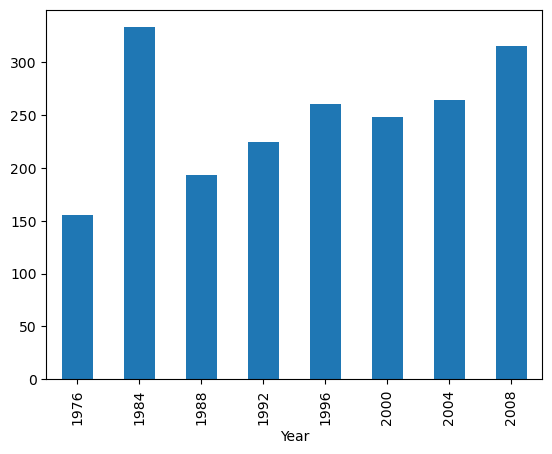

In [505]:
medal_usa.plot(kind='bar')

In [506]:
#3. Create a dataframe that lists every country and the types of medals they won
df1 = df.groupby(["Country"])
df2 = df1["Medal"].value_counts()
df2

Country      Medal 
Afghanistan  Bronze     1
Algeria      Bronze     8
             Gold       4
             Silver     2
Argentina    Bronze    70
                       ..
Zambia       Silver     1
             Bronze     1
Zimbabwe     Gold      18
             Silver     4
             Bronze     1
Name: count, Length: 301, dtype: int64

In [507]:
country_df = pd.DataFrame(df2.unstack())
country_df.head()

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,1.0,NaN,NaN
Algeria,8.0,4.0,2.0
Argentina,70.0,46.0,37.0
Armenia,7.0,1.0,1.0
Australia,312.0,216.0,270.0


In [508]:
country_df = country_df.fillna(0)
country_df = country_df.astype(int)
country_df

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,1,0,0
Algeria,8,4,2
Argentina,70,46,37
Armenia,7,1,1
Australia,312,216,270
...,...,...,...
Virgin Islands*,0,0,1
West Germany,126,84,135
Yugoslavia,102,90,86


In [509]:
country_df.loc[:,'Total'] = country_df.sum(axis=1)
country_df.loc['Total',:] = country_df.sum(axis=0)
country_df

Medal,Bronze,Gold,Silver,Total
Country,,,,
Afghanistan,1.0,0.0,0.0,1.0
Algeria,8.0,4.0,2.0,14.0
Argentina,70.0,46.0,37.0,153.0
Armenia,7.0,1.0,1.0,9.0
Australia,312.0,216.0,270.0,798.0
...,...,...,...,...
West Germany,126.0,84.0,135.0,345.0
Yugoslavia,102.0,90.0,86.0,278.0
Zambia,1.0,0.0,1.0,2.0


In [510]:
#Create a dataframe with the count of medals each country has won per year
medal_yr = df[["Year", "Country", "Medal"]]
medal_yr

,Year,Country,Medal
0,1976,East Germany,Silver
1,1976,Soviet Union,Bronze
2,1976,United States,Gold
3,1976,Italy,Silver
4,1976,United States,Bronze
...,...,...,...
15428,2008,France,Bronze
15429,2008,Georgia,Gold
15430,2008,Azerbaijan,Silver
15431,2008,France,Gold


In [511]:
medals = pd.get_dummies(medal_yr,columns=['Year']).groupby('Country').sum()
medals.drop('Medal', axis=1, inplace=True)
medals

,Year_1976,Year_1980,Year_1984,Year_1988,Year_1992,Year_1996,Year_2000,Year_2004,Year_2008
Country,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,1
Algeria,0,0,2,0,2,3,5,0,2
Argentina,0,0,0,13,2,20,20,47,51
Armenia,0,0,0,0,0,2,1,0,6
Australia,24,12,50,34,57,132,183,157,149
...,...,...,...,...,...,...,...,...,...
Virgin Islands*,0,0,0,1,0,0,0,0,0
West Germany,75,0,157,113,0,0,0,0,0
Yugoslavia,19,57,87,63,0,26,26,0,0


In [512]:
medals.columns=medals.columns.str.replace('Year_','')
medals.columns=medals.columns.str.replace('.0','')
medals

,1976,1980,1984,1988,1992,1996,2000,2004,2008
Country,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,1
Algeria,0,0,2,0,2,3,5,0,2
Argentina,0,0,0,13,2,20,20,47,51
Armenia,0,0,0,0,0,2,1,0,6
Australia,24,12,50,34,57,132,183,157,149
...,...,...,...,...,...,...,...,...,...
Virgin Islands*,0,0,0,1,0,0,0,0,0
West Germany,75,0,157,113,0,0,0,0,0
Yugoslavia,19,57,87,63,0,26,26,0,0
